In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("./train_data.csv")

In [33]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [34]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [35]:
df.shape

(3499, 13)

In [36]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 22
Power                  22
Seats                  25
New_Price            3018
Price                   0
dtype: int64

In [37]:
df=df.dropna(subset=["Engine", "Power", "Seats"])

In [38]:
df = df.drop("New_Price", axis='columns')

In [42]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [43]:
df.shape

(3474, 12)

### ---------

In [44]:
df["Mileage"]

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
3494    22.32 kmpl
3495     18.9 kmpl
3496    24.52 kmpl
3497     24.4 kmpl
3498     22.9 kmpl
Name: Mileage, Length: 3474, dtype: object

In [45]:
count_kmkg = 0
count_kmpl = 0
for i in df["Mileage"]:
    if "km/kg" in str(i):
        count_kmkg += 1
    elif "kmpl" in str(i):
        count_kmpl += 1
print('The no of rows with km/kg: ', count_kmkg)
print('The no of rows with kmpl: ', count_kmpl)

The no of rows with km/kg:  42
The no of rows with kmpl:  3432


<b>Formula: 1 kmpl = 1 km/kg / density

In [46]:
fuel_density = {'CNG': 0.128, 'Diesel': 0.832, 'Petrol': 0.745, 'LPG': 0.579}

Transformed_Mileage = []
for i, fuel_type in zip(df['Mileage'], df['Fuel_Type']):
    if "kmpl" in str(i):
        i = i[:-5]
        i = float(i) / fuel_density[fuel_type] if fuel_type in fuel_density else float(i)
    elif str(i).endswith('km/kg'):
        i = i[:-6]
    Transformed_Mileage.append(float(i))

In [47]:
df["Mileage"] = Transformed_Mileage

In [48]:
df['Engine'] = df['Engine'].str.replace(' CC', '')       
df['Engine'] = df['Engine'].astype('float64')

In [49]:
df['Power'] = df['Power'].str.replace(' bhp', '')    

In [50]:
df['Power'] = df['Power'].replace('null', np.nan)
df['Power'] = df['Power'].astype('float64')

In [51]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                64
Seats                 0
Price                 0
dtype: int64

In [52]:
df=df.dropna(subset=["Power"])

In [53]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,23.641827,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,24.429530,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,24.963942,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,18.269231,1968.0,140.80,5.0,17.74


### ------------------

<AxesSubplot:xlabel='Price', ylabel='Count'>

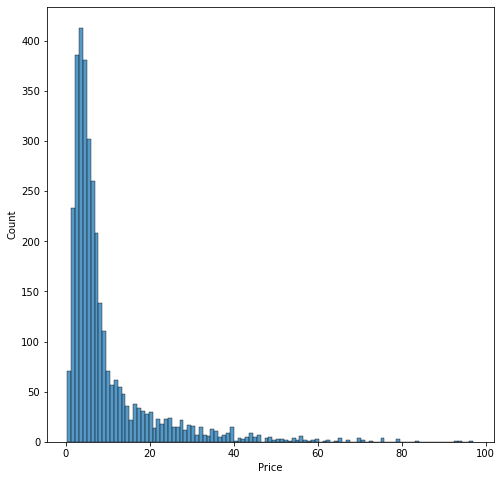

In [54]:
f, ax = plt.subplots(figsize=(8,8))
sns.histplot(df['Price'])

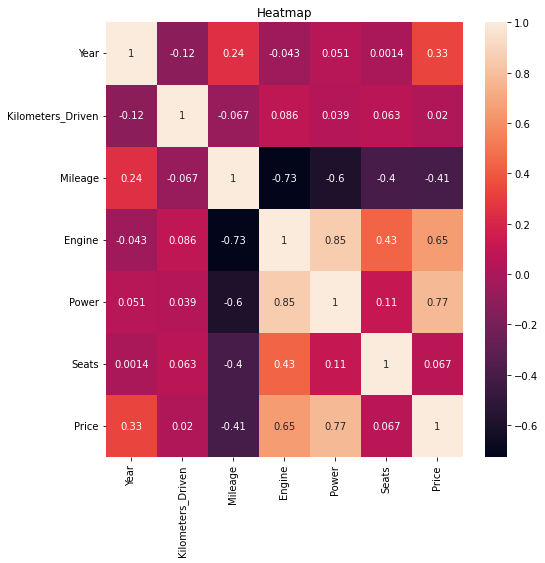

In [55]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

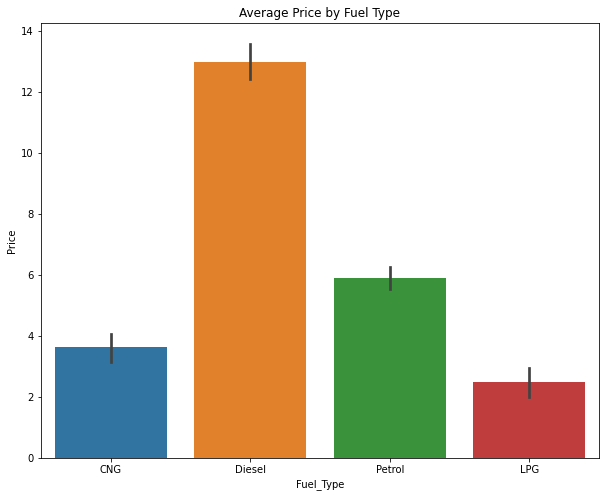

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Fuel_Type', y='Price', data=df)
plt.title('Average Price by Fuel Type')
plt.show()

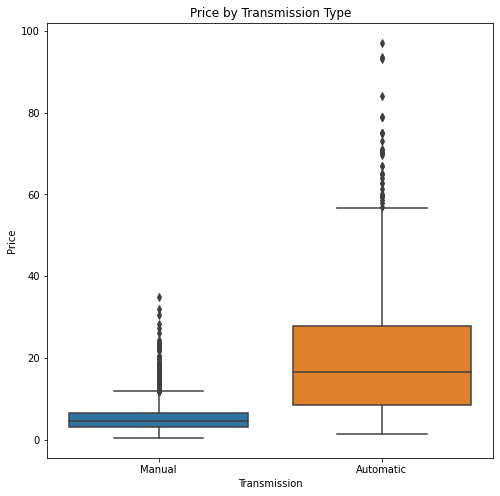

In [57]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Price by Transmission Type')
plt.show()

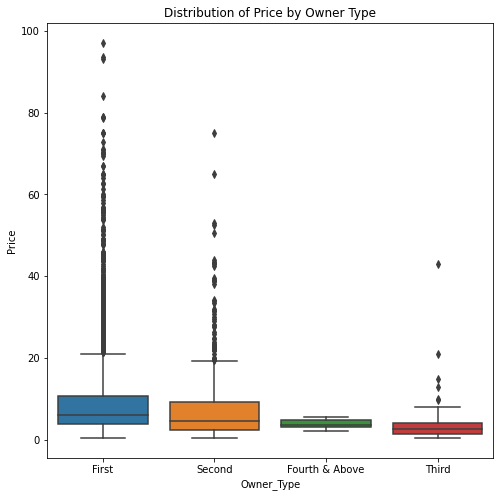

In [58]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="Owner_Type", y="Price", data=df)
plt.title("Distribution of Price by Owner Type")
plt.show()

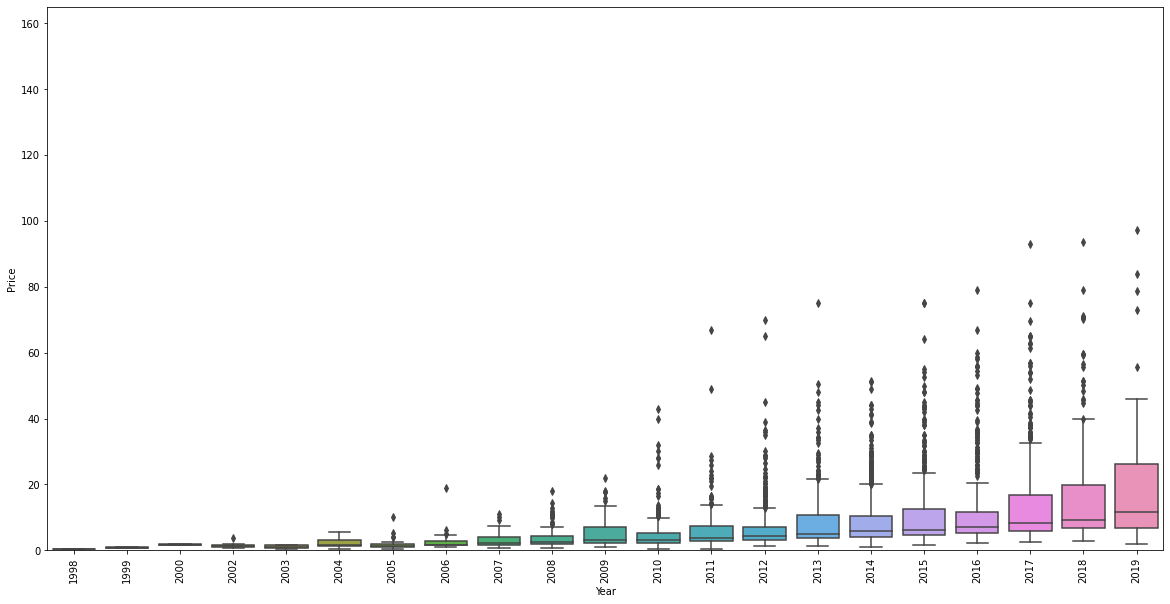

In [61]:
data = pd.concat([df['Price'], df['Year']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

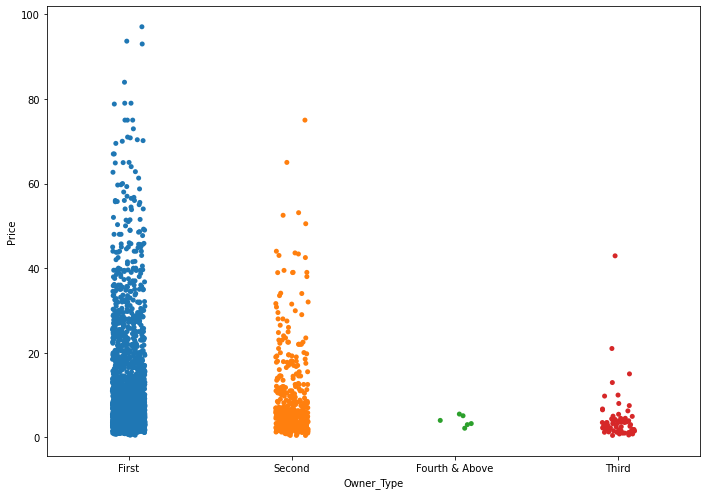

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'Owner_Type', y ='Price', data = df) 

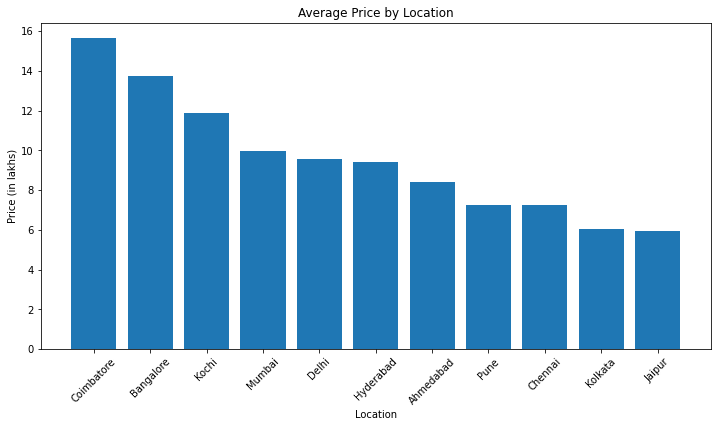

In [65]:
import matplotlib.pyplot as plt

price_by_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(price_by_location.index, price_by_location.values)
plt.xticks(rotation=45)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Price (in lakhs)')
plt.show()

### -------------------------

In [66]:
df = df.drop("Name", axis='columns')

In [67]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [68]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [69]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [70]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [71]:
df["Location"].value_counts()

Mumbai        467
Hyderabad     397
Coimbatore    374
Kochi         372
Pune          337
Kolkata       317
Delhi         312
Chennai       261
Jaipur        242
Bangalore     205
Ahmedabad     126
Name: Location, dtype: int64

In [72]:
Location = df[["Location"]]
Location = pd.get_dummies(Location) #drop first is false

In [73]:
Location.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [74]:
df["Fuel_Type"].value_counts()

Diesel    1861
Petrol    1508
CNG         34
LPG          7
Name: Fuel_Type, dtype: int64

In [75]:
Fuel_Type = df[["Fuel_Type"]]
Fuel_Type = pd.get_dummies(Fuel_Type) #drop first is false

In [76]:
Fuel_Type.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [77]:
df["Transmission"].value_counts()

Manual       2413
Automatic     997
Name: Transmission, dtype: int64

In [78]:
Transmission = df[["Transmission"]]
Transmission = pd.get_dummies(Transmission,drop_first=True)

In [79]:
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [80]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['Owner_Type_Encoded'] = le.fit_transform(df['Owner_Type'])

label_dict = {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3}
df['Owner_Type_Encoded'] = df['Owner_Type'].map(label_dict)

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Encoded
0,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.0,58.16,5.0,1.75,0
1,Pune,2015,41000,Diesel,Manual,First,23.641827,1582.0,126.20,5.0,12.50,0
2,Chennai,2011,46000,Petrol,Manual,First,24.429530,1199.0,88.70,5.0,4.50,0
3,Chennai,2012,87000,Diesel,Manual,First,24.963942,1248.0,88.76,7.0,6.00,0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,18.269231,1968.0,140.80,5.0,17.74,1


### -------------

In [81]:
train_df= pd.concat([df,Location,Fuel_Type,Transmission],axis=1)
train_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.0,58.16,5.0,...,0,0,0,1,0,1,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,First,23.641827,1582.0,126.20,5.0,...,0,0,0,0,1,0,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,First,24.429530,1199.0,88.70,5.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,First,24.963942,1248.0,88.76,7.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,Second,18.269231,1968.0,140.80,5.0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
train_df = train_df.drop(["Location","Fuel_Type","Transmission","Owner_Type"],axis='columns')

In [83]:
train_df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Owner_Type_Encoded', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

### --------------------

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xg

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [85]:
df_car = train_df.drop(["Price"], axis='columns')

In [86]:
df_car.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Owner_Type_Encoded,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.600000,998.0,58.16,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2015,41000,23.641827,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2011,46000,24.429530,1199.0,88.70,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,24.963942,1248.0,88.76,7.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,18.269231,1968.0,140.80,5.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


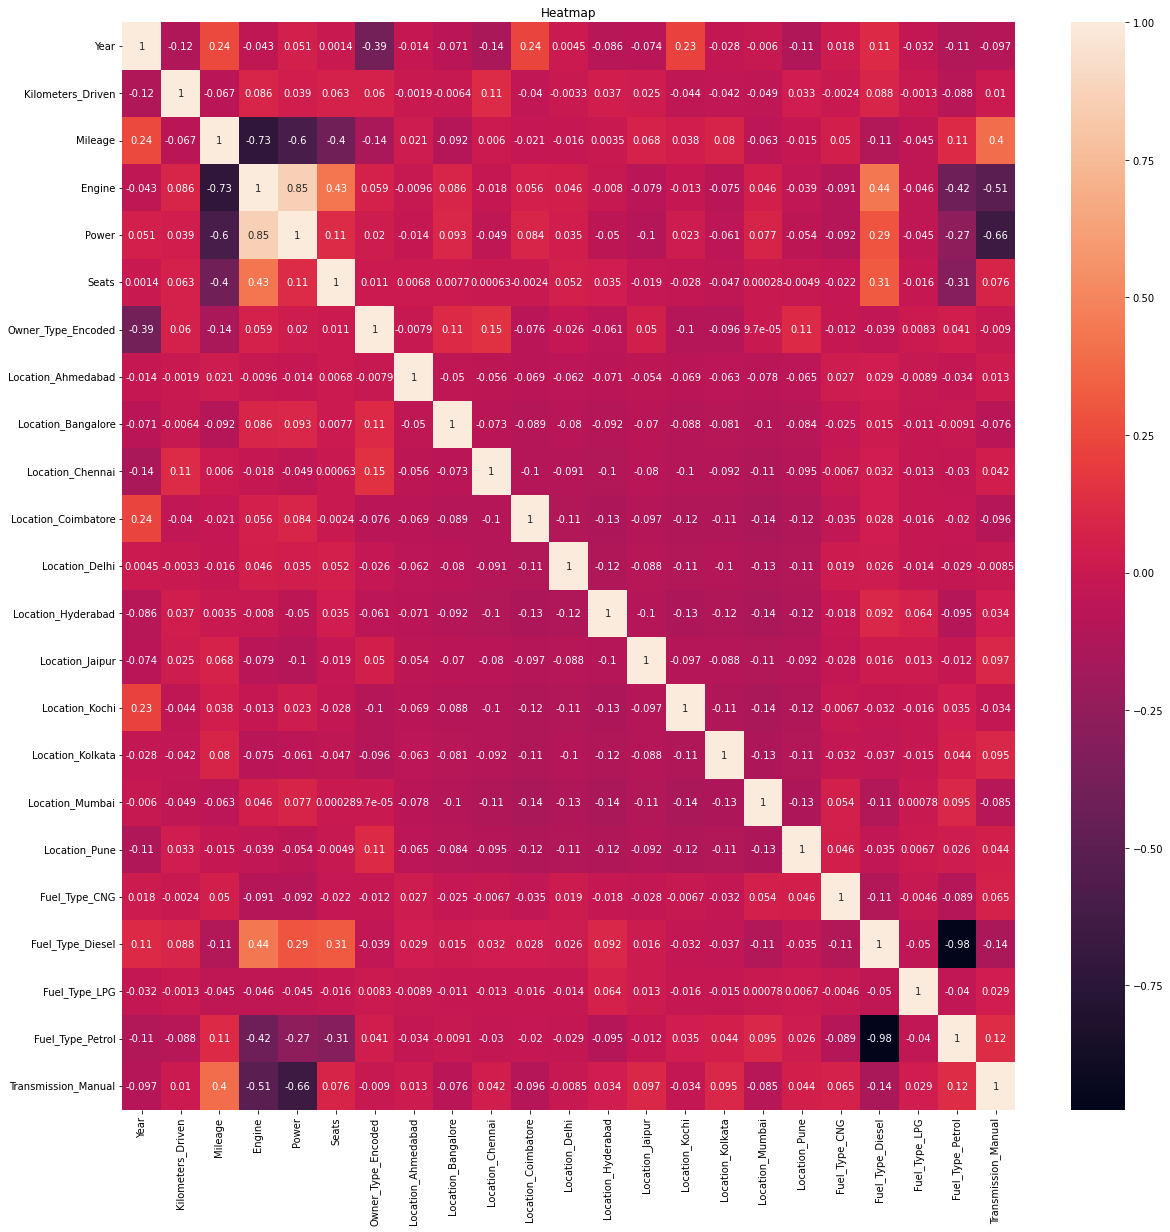

In [88]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_car.corr(), annot=True)
plt.title("Heatmap")
plt.show()

In [223]:
df_price = train_df["Price"]

In [224]:
df_car = np.array(df_car)
df_price = np.array(df_price)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(df_car, df_price,test_size=0.2, shuffle = True, random_state = 8)

In [226]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2728, 23)
y_train shape: (2728,)
X_test shape: (682, 23)
y_test shape: (682,)


In [227]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [240]:
# scaler.scale_
# scaler.mean_
# scaler.n_samples_seen_
# scaler.var_

## -------------------------

In [68]:
xgb_model = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 50, max_depth=7, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [69]:
xgb_model.score(X_train_scaled, y_train)

0.9971048415455149

In [70]:
xgb_model.score(X_test_scaled, y_test)

0.9097875069377117

In [71]:
y_pred = xgb_model.predict(X_test_scaled)

In [72]:
y_pred[:5]

array([32.978672,  4.418871,  8.060228, 71.06865 , 53.26439 ],
      dtype=float32)

In [73]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [74]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.618753431154486
The Mean Squared Error is =  11.443771406640174
The value of R2 is =  0.9097875069377117


### ------------

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {
    'n_estimators': [110, 180, 220, 280, 320],
    'max_depth': [5, 7, 16, 20],
}

xg1 = xg.XGBRegressor()
grid_search = GridSearchCV(xg1, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 220}


In [77]:
xgb_model1 = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 220, max_depth=5, n_jobs=-1)
xgb_model1.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
xgb_model1.score(X_train_scaled, y_train)

0.9987417486503154

In [79]:
xgb_model1.score(X_test_scaled, y_test)

0.9127036318831331

In [80]:
y_pred = xgb_model1.predict(X_test_scaled)

In [81]:
y_pred[:5]

array([38.564617,  3.954085,  8.32547 , 73.3048  , 66.35561 ],
      dtype=float32)

In [82]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [83]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.6064118420850495
The Mean Squared Error is =  11.07385072120294
The value of R2 is =  0.9127036318831331


### ------------------

In [84]:
'''
LR model
'''

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [85]:
y_pred = lr_model.predict(X_test_scaled)

In [86]:
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

In [87]:
print("The Mean Absolute Error is = ", lr_mae)
print("The Mean Squared Error is = ", lr_mse)
print("The value of R2 is = ", lr_r2)

The Mean Absolute Error is =  3.7444714584265317
The Mean Squared Error is =  36.482822425878446
The value of R2 is =  0.712401947920984


In [88]:
'''
Decision Tree model
'''

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [89]:
y_pred = dt_model.predict(X_test_scaled)

In [90]:
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

In [91]:
print("The Mean Absolute Error is = ", dt_mae)
print("The Mean Squared Error is = ", dt_mse)
print("The value of R2 is = ", dt_r2)

The Mean Absolute Error is =  2.233717008797654
The Mean Squared Error is =  24.13045340909091
The value of R2 is =  0.8097770146392149


In [92]:
'''
RF model
'''

rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1)

In [93]:
y_pred = rf_model.predict(X_test_scaled)

In [94]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [95]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.7671450011926424
The Mean Squared Error is =  11.976977195389058
The value of R2 is =  0.9055841877862675


In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
'''
AdaBoost model
'''

ada_reg_dt = AdaBoostRegressor(base_estimator = dt_model, n_estimators=25)
# print(ada_reg)
ada_reg_dt.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=25)

In [98]:
y_pred = ada_reg_dt.predict(X_test_scaled)

In [99]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [100]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.7125219941348975
The Mean Squared Error is =  11.403568328445747
The value of R2 is =  0.9101044321701218


In [521]:
# base_estimators = [dt_model, rf_model, xgb_model1]

# # Define hyperparameters for grid search
# params = {
#     'base_estimator': base_estimators,
#     'n_estimators': [15, 50, 70, 100],
# }

# # Create AdaBoostRegressor object
# ada = AdaBoostRegressor()

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=5)

# # Fit the grid search object
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [101]:
'''
AdaBoost model
'''

ada_reg = AdaBoostRegressor(base_estimator = rf_model, n_estimators=20)
# print(ada_reg)
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=10,
                                                       n_estimators=50,
                                                       n_jobs=-1),
                  n_estimators=20)

In [102]:
y_pred = ada_reg.predict(X_test_scaled)

In [103]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [104]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.6920896026587353
The Mean Squared Error is =  10.218687689441877
The value of R2 is =  0.9194449749533998


In [105]:
'''
AdaBoost model
'''
# ada_reg_xg = AdaBoostRegressor(base_estimator = xgb_model1, n_estimators=25)

ada_reg_xg = AdaBoostRegressor(base_estimator = xgb_model1, n_estimators=15)
# print(ada_reg)
ada_reg_xg.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_threshold=64,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=5,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=220, n_jobs=-1,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=0, ...),
                  n_estimators=15)

In [106]:
y_pred = ada_reg_xg.predict(X_test_scaled)

In [107]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [108]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.4888069866025202
The Mean Squared Error is =  9.080743927401095
The value of R2 is =  0.9284155092371249


In [109]:
import pickle
pickle.dump(ada_reg_xg, open("ada_reg_xg1.pkl", 'wb'))

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### ------------------

In [118]:
# base_estimators = [dt_model, rf_model, xgb_model]
# Define hyperparameters for grid search
params = {
    'base_estimator': [xgb_model1],
    'n_estimators': [25, 30, 45, 75],
}

# Create AdaBoostRegressor object
ada = AdaBoostRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=5)

# Fit the grid search object
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'base_estimator': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...), 'n_estimators': 30}


In [119]:
'''
AdaBoost model
'''
ada_xg = AdaBoostRegressor(base_estimator = xgb_model1, n_estimators=30)

# print(ada_reg)
ada_xg.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_threshold=64,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=5,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=220, n_jobs=-1,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=0, ...),
                  n_estimators=30)

In [120]:
y_pred = ada_xg.predict(X_test_scaled)

In [121]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [122]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  1.4820294661186308
The Mean Squared Error is =  8.771422358969712
The value of R2 is =  0.9308539247606944


In [123]:
import pickle
pickle.dump(ada_reg_xg, open("ada_reg_xg1.pkl", 'wb'))